## Assignment 3

In this assignment, we will solve problem for line fitting and extraction for robot
localisation.

### GROUPNUMBER :4
### STUDENT NAMES : 
### STUDENT NUMBERS :

In [1]:
import numpy as np
import pandas as pd
from numpy.random import normal
import time
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import math
from util import *

## Introduction 
For a lot of application in robotics, knowledge of the position and orientation of the 
platform is essential. This exercise could be motivated by an autonomous vehicle 
hauling goods across the corridors of a warehouse. In order to navigate from one place 
to another, the vehicle would need to know its position in the warehouse as well as its 
heading. On its way, it might come across walls, doorways, and racks, all of which would 
be perceived as measurements located along lines by a laser scanner mounted in a way 
that its scanning plane is parallel to the ground. 


## Exercise 1 Line representations

A range scan describes a 2D slice of the environment. Points in a range scan are specified in a polar coordinate system with the origin at the location of the sensor. It is common in literature to assume that the noise on measurements follows a Gaussian distribution with zero mean, some range variance and negligible angular uncertainty. 
We choose to express a line in polar parameters $(\rho, \alpha)$ as defined by the line equation for the Cartesian coordinates $( x, y )$ of the points lying on the line 
$x\cos(\alpha)\ + y\sin(\alpha)\ = \rho$, 
where $—\pi < \alpha < \pi$ is the angle between the x-axis and the shortest connection between the origin and the line. This connection's length is $\rho > 0$.


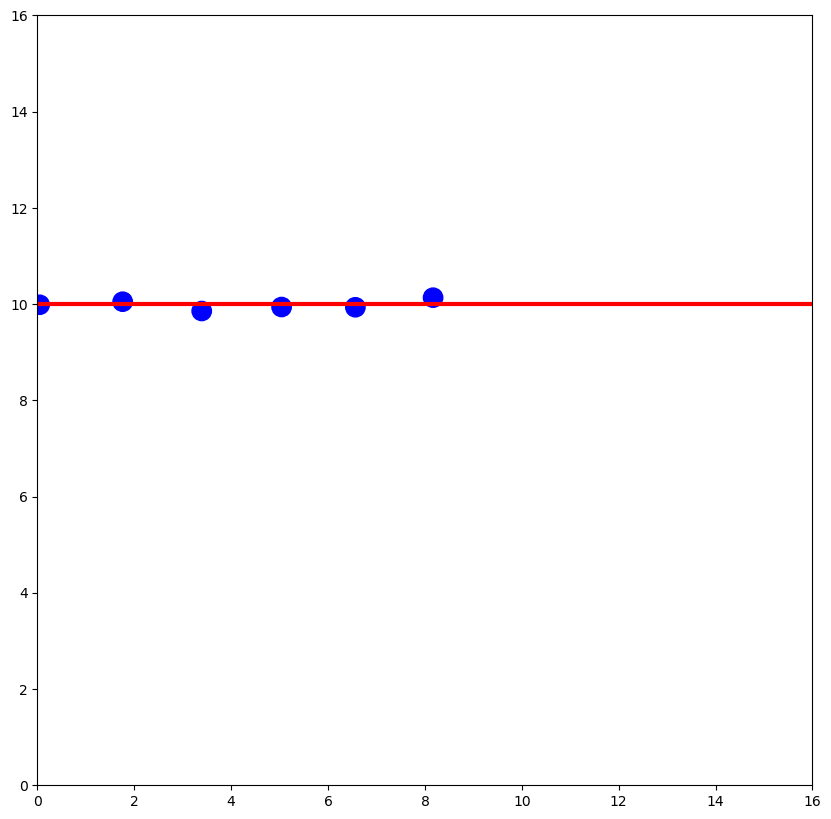

In [2]:
x_points, y_points = get_coords(1)
rho, alpha = get_line(1)

visualize(x_points, y_points, [(rho, alpha)])

### Theory question 1

What are problems with using the classical ax + b = y notation for lines. Tip think about hough spaces.

### Answer

The Hough transform is computationally more efficient.

## Exercise 1: fitline
The first step in creating the Split-and-Merge algorithm is to calculate the best fitting lines for the given points. In this exercise you will finish the fitLine algorithm using a set of points in Cartesian coordinates after reading the following theory. 
The aim of the function is to minimize the sum of squared errors:<br><br>
$$
S(r, \alpha):=\sum_{i}(\underbrace{\rho-x^{i} \cos \alpha-y^{i} \sin \alpha}_{=\left(D(\alpha, \rho),\left(x^{i}, y^{i}\right)\right)})^{2}
$$
where $\left(x^{i}, y^{i}\right)$ are the input points in Cartesian coordinates. The solution of $(\rho, \alpha)$ can be found by imposing: $\nabla S=0 .$ <br>

The solution for $\alpha$ is then
$$
\begin{array}{c}
{\alpha=\frac{\tan ^{-1}\left(\frac{n u m}{d e n o m}\right)}{2}} \\\\
{n u m:=-2 \sum_{i}\left(x^{i}-x_{c}\right)\left(y^{i}-y_{c}\right)} \\\\
{\text { denom }:=\sum_{i}\left(y^{i}-y_{c}\right)^{2}-\left(x^{i}-x_{c}\right)^{2}}
\end{array}
$$<br>
where $\left(x_{c}, y_{c}\right)$ are the Cartesian coordinate of the $\left(x^{i}, y^{i}\right)$ 's centroid. In order to solve for $\rho$ consider the equation (1) and a point that will surely lie on the line (which one is it?).
Remember that the formula for polar coordinates is $x\cos(\alpha)\ + y\sin(\alpha)\ = \rho$.

Please find additional information on $[1, \text { pp. } 244]$ including a solution for polar input on $[1, \mathrm{p} .246] .$ 
Tip: use arctan2 or atan2 when calculating alpha

In [3]:
def fitLine(x_points, y_points):
    """
    This function fits a polar line using the mse fit.=
    input:
        - x_points : np_array
        - y_points : np_array
    output:
        - (alpha, rho) : tupple
            - alpha : float
            - rho : float
        """

    x_c = np.mean(x_points)
    y_c = np.mean(y_points)

    num = -2 * np.sum((x_points - x_c) * (y_points - y_c))
    den = np.sum((y_points - y_c) ** 2 - (x_points - x_c) ** 2)

    alpha = (np.arctan2(num, den)) * 0.5
    rho = x_c * np.cos(alpha) + y_c * np.sin(alpha)

    return rho, alpha


The cell below is a method for validating your implementation

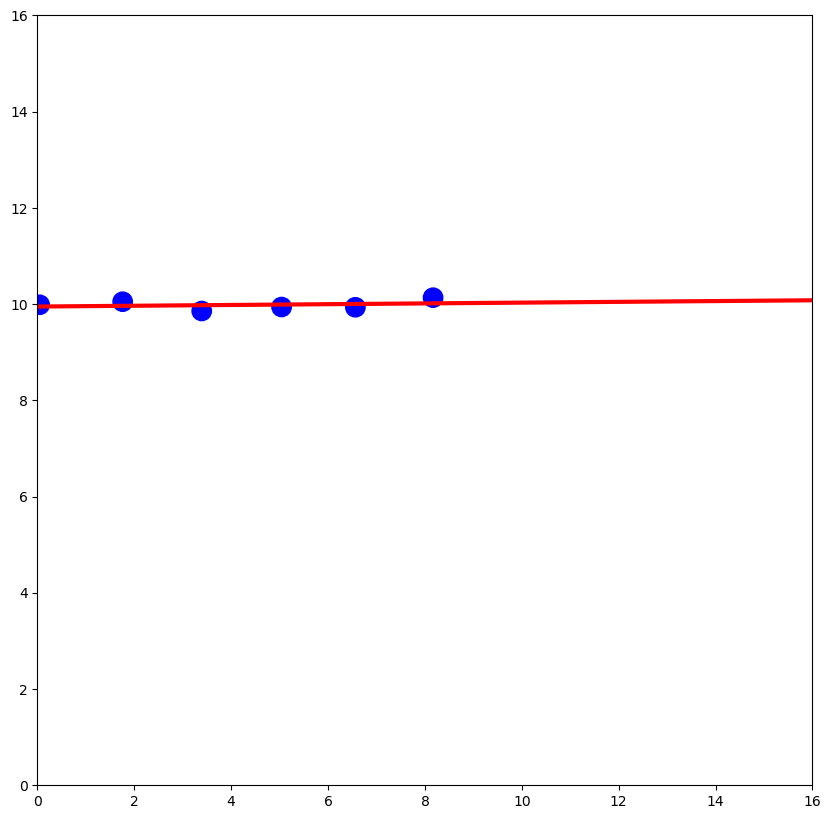

In [4]:
x_points, y_points = get_coords(1)
rho, alpha = fitLine(x_points, y_points)

visualize(x_points, y_points, [(rho, alpha)])

Function get_single_line returns points from a random generated line. Try your implementation a few times to see if it is consistent with different situations. An epsilon can be given to the function to change the amount of noise on the data points.

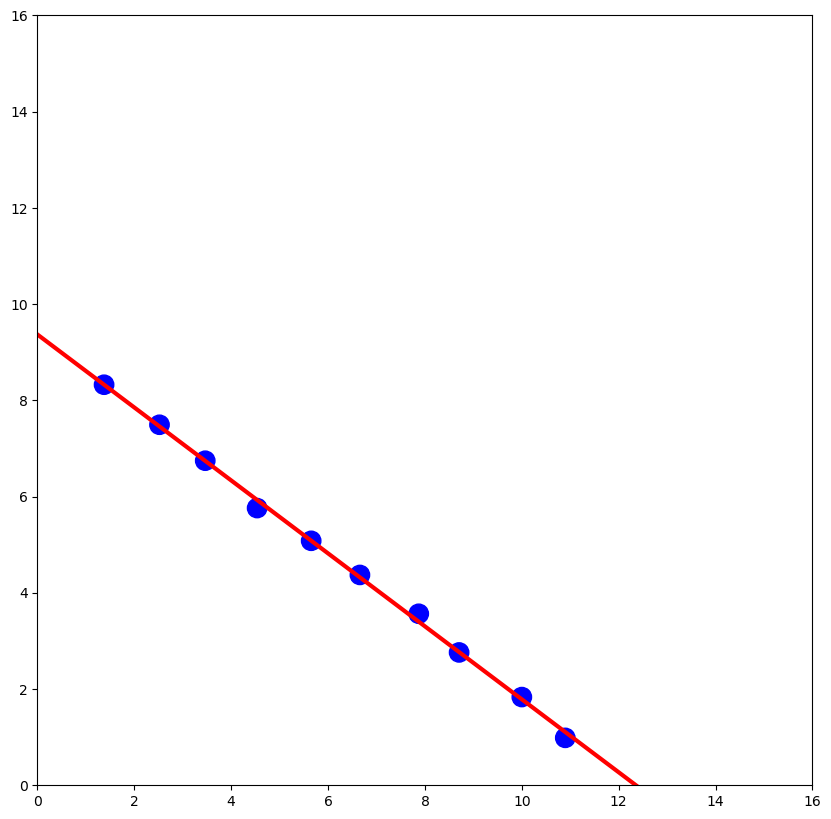

In [5]:
x_points, y_points = get_single_line()
rho, alpha = fitLine(x_points, y_points)

visualize(x_points, y_points, [(rho, alpha)])

## Exercise 2 Split and merge
We employ the popular “Split-and-Merge” \[1, p.249-250\] line extraction algorithm to
divide the obtained range measurements (points) into segments of points lying roughly
on a common line. [https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=905371]

While the just implemented fitLine is generally a good algorithm to fit lines it can sometimes cause problems when it is used in combination with split and merge. A better line fit algorithm is called "iterative-end-point-fit". This is small modification on the normal fitLine that fits the line based on only the first and last point of the given points. You don't have to implement this yourself since it is already given below. 

In [6]:
def iterative_end_point_fit(x_points, y_points):
    """
    This function fits a polar line using iterative-end-point-fit
    input:
        - x_points : np_array
        - y_points : np_array
    output:
        - (alpha, rho) : tupple
            - alpha : float
            - rho : float
    """
    x = np.array([x_points[0], x_points[-1]])
    y = np.array([y_points[0], y_points[-1]])

    return fitLine(x, y)

### Exercise 2.1: get furthest point from the line

The first step is to calculate the furthest point from a line. Implement the function get_furthest_point which takes a line and points and returns the argument of the furthest point. Below is a example shown

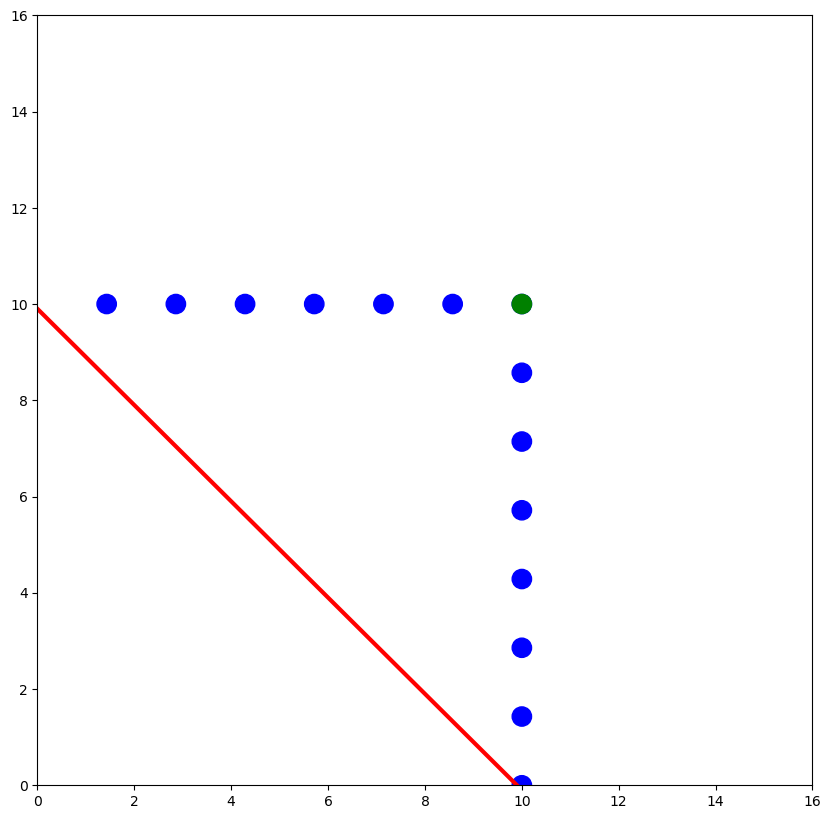

In [7]:
x_points, y_points = get_coords(2)
rho, alpha = get_line(2)
arg_D = get_arg()  # argument of the furthest point

visualize_furthest(x_points, y_points, x_points[arg_D], y_points[arg_D], (rho, alpha))

Now implement get_furthest_point yourself

In [8]:
def get_furthest_point(line, x_points, y_points):
    """
        This function will return the distance of the point that is the furthest from the line
        input:
            - line : tupple (alpha, rho)
            - x_points : np_array
            - y_points : np_array
        return:
            - arg_D : the argument of the furthest point
            - dis : distance of the furthest point
    """
    points = polar_to_cartesian(line[0], line[1])
    p1 = np.array([points[0], points[2]])
    p2 = np.array([points[1], points[3]])

    distances = []

    for i in range(len(x_points)):
        p3 = np.array([x_points[i], y_points[i]])
        distances.append(np.cross(p2 - p1, p3 - p1) / np.linalg.norm(p2 - p1))

    return np.argmax(distances), max(distances)

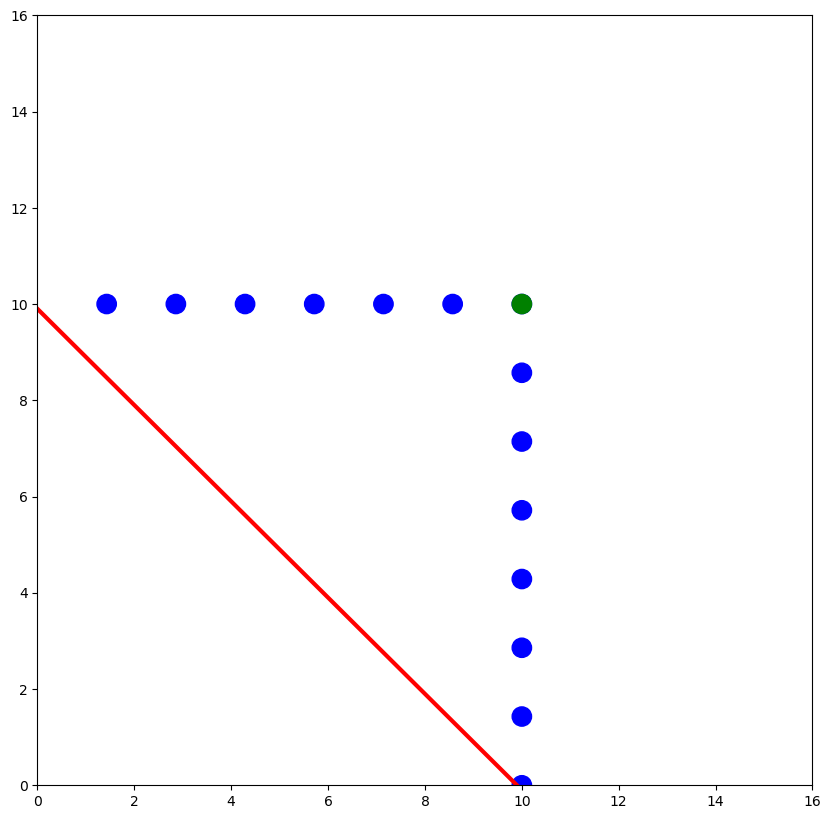

In [9]:
arg_D, _ = get_furthest_point((rho, alpha), x_points, y_points)

visualize_furthest(x_points, y_points, x_points[arg_D], y_points[arg_D], (rho, alpha))

### Exercise 2.2: split the points based on the furthest point

The second step is to split the set of points into two sets of points based on the furthest point. Implement the function split_points which should group the points depending on which side of the points furthest from the line they are located. Below is a example shown

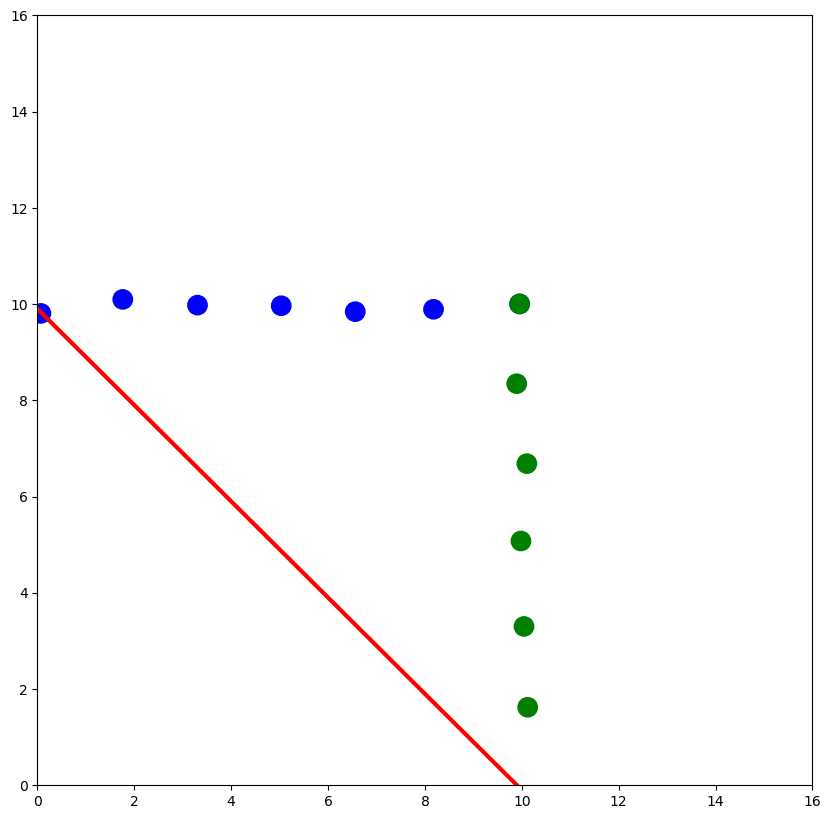

In [10]:
L1_x, L1_y, L2_x, L2_y = get_coords(3)
rho, alpha = get_line(2)

visualize_split(L1_x, L1_y, L2_x, L2_y, (rho, alpha))

Now implement split_points yourself

In [11]:
def split_points(x_points, y_points, arg_D):
    """
        This function will split the x and y points into a group of points that lie below this line and above this line
        input:
            - line : tupple (alpha, rho)
            - x_points : np_array
            - y_points : np_array
            - arg_D : argument of the furthest point
        returns:
            - x_points_1 : np_array
            - y_points_1 : np_array
            - x_points_2 : np_array
            - y_points_2 : np_array
    """

    x_D = x_points[arg_D]
    y_D = y_points[arg_D]
    furthest_angle = np.arctan2(y_D, x_D)

    x_points_1 = []
    y_points_1 = []
    x_points_2 = []
    y_points_2 = []

    for x, y in zip(x_points, y_points):
        angle = np.arctan2(y, x)

        if angle < furthest_angle:
            x_points_1.append(x)
            y_points_1.append(y)
        elif angle > furthest_angle:
            x_points_2.append(x)
            y_points_2.append(y)

    if len(x_points_2) < len(x_points_1):
        x_points_1.append(x_D)
        y_points_1.append(y_D)
    else:
        x_points_2.insert(0, x_D)
        y_points_2.insert(0, y_D)

    return x_points_2, y_points_2, x_points_1, y_points_1


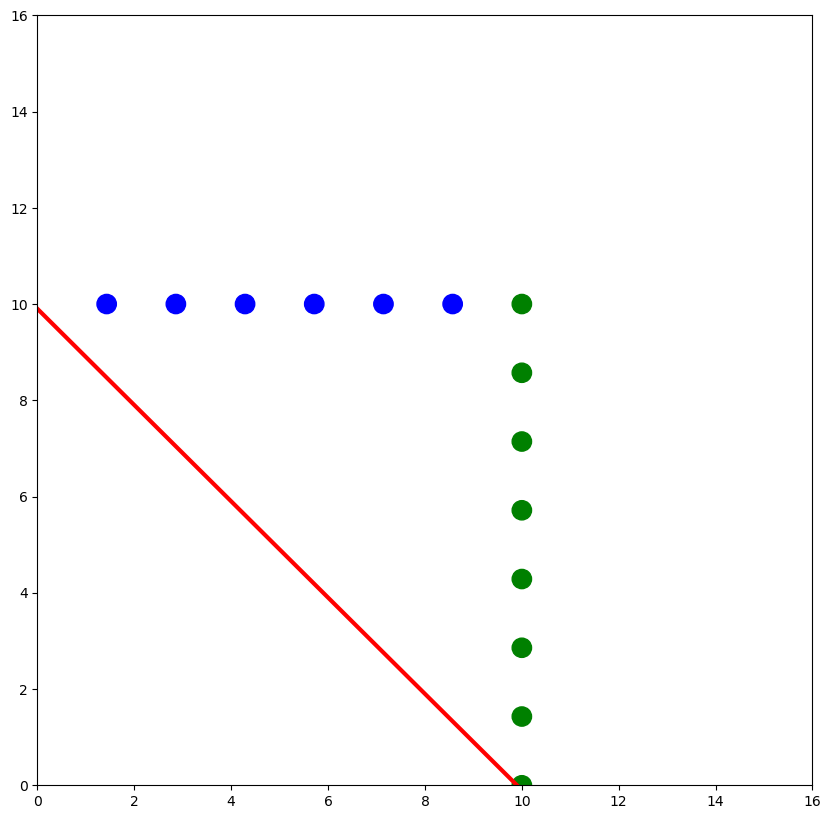

In [12]:
x_points, y_points = get_coords(2)
rho, alpha = get_line(2)
arg_D = get_arg()

L1_x, L1_y, L2_x, L2_y = split_points(x_points, y_points, arg_D)

visualize_split(L1_x, L1_y, L2_x, L2_y, (rho, alpha))

### Exercise 2.3: Implementing split and merge

Implement the split and merge algorithm using the functions created in Exercise 2.1 and 2.2

An example of a correct results is shown below

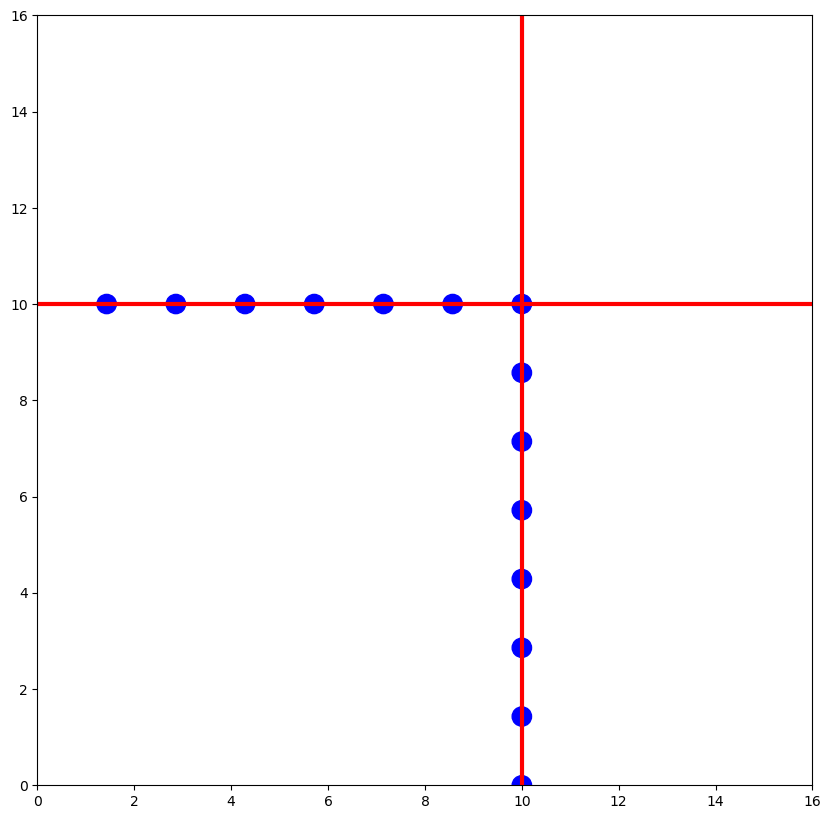

In [13]:
x_points, y_points = get_coords(2)

lines = get_line(3)

visualize(x_points, y_points, lines)

Now implement split and merge yourself

In [14]:
def split_and_merge(x_points, y_points, D=0.35):
    """
        This function will split and merge untill the furthest point is smaller than the threshold
        input:
            - x_points : np_array
            - y_points : np_array
        output:
            - lines : list of tupples [(alpha1, rho1), (alpha2, rho2), ...]
    """

    lines = {}
    lines[iterative_end_point_fit(x_points, y_points)] = [x_points, y_points]

    arg_D, dis = get_furthest_point(iterative_end_point_fit(x_points, y_points), x_points, y_points)

    print("Furthest point", x_points[arg_D], y_points[arg_D])
    iter = 0

    while dis >= D and iter < len(x_points):
        newlines = {}
        print("Iter:", iter, lines)

        for line, points in lines.items():
            arg_D, far_dis = get_furthest_point(line, points[0], points[1])

            if far_dis < D:
                newlines[line] = points
                continue

            x_points_1, y_points_1, x_points_2, y_points_2 = split_points(points[0], points[1], arg_D)
            line1 = iterative_end_point_fit(x_points_1, y_points_1)
            line2 = iterative_end_point_fit(x_points_2, y_points_2)
            newlines[line1] = [x_points_1, y_points_1]
            newlines[line2] = [x_points_2, y_points_2]

            if len(x_points_1) == 1 or y_points_1 == 1 or len(y_points_2) ==1 or len(x_points_2) == 1:
                print("One of the lines has only one point")
                return newlines.keys()

            arg_D, dis1 = get_furthest_point(line1, x_points_1, y_points_1)
            arg_D, dis2 = get_furthest_point(line2, x_points_2, y_points_2)
            dis = max(dis1, dis2)

        lines = {}
        lines = newlines
        iter += 1
    print("Number of iterations", iter)
    return lines.keys()

Furthest point 10.0 10.0
Iter: 0 {(7.592566024188912, 0.7086262720453174): [array([10.        , 10.        , 10.        , 10.        , 10.        ,
       10.        , 10.        , 10.        ,  8.57142857,  7.14285714,
        5.71428571,  4.28571429,  2.85714286,  1.42857143]), array([ 0.        ,  1.42857143,  2.85714286,  4.28571429,  5.71428571,
        7.14285714,  8.57142857, 10.        , 10.        , 10.        ,
       10.        , 10.        , 10.        , 10.        ])]}
Number of iterations 1


/home/mabel/Documents/UvA_year_3/AMR/Assignment 3/util.py:65: RuntimeWarning: divide by zero encountered in scalar divide
  x = (rho_diff - (rho_1 * y_part))/(x_part)


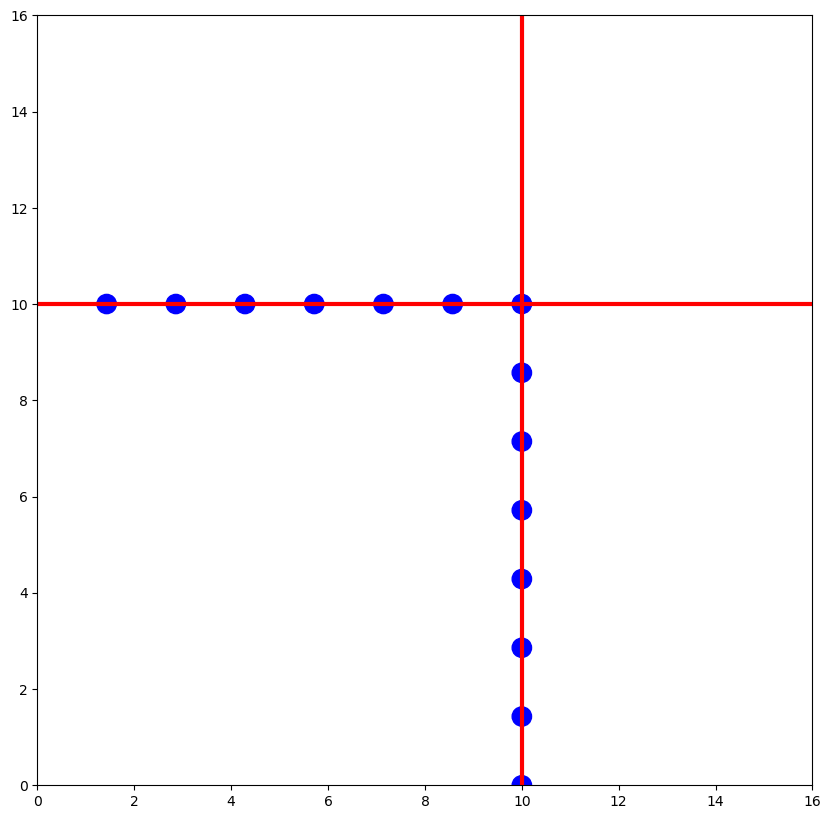

In [15]:
lines = split_and_merge(x_points, y_points, 2)

visualize(x_points, y_points, lines)

Try the algorithm on other situations

Try your implementation of the split-and-merge algorithm using the functions get_single_line, get_double_line and get_triple_line to test how consistent it is. All three functions can be given an epsilon to change the amount of noise on the points.

Furthest point 6.220359521455191 5.0571646370043855
Number of iterations 0


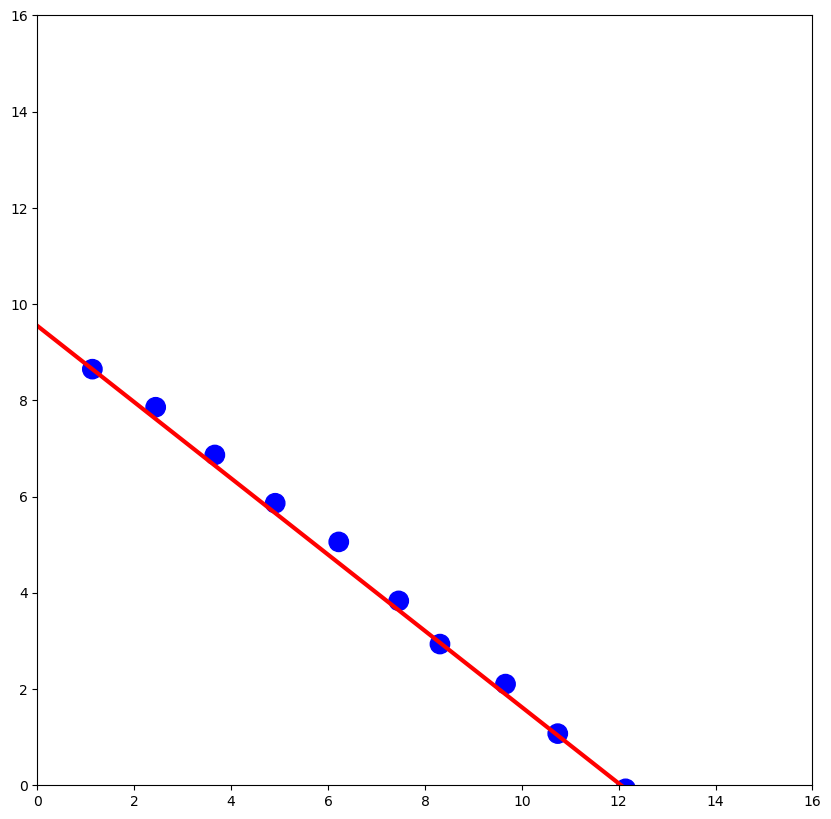

In [16]:
x_points, y_points = get_single_line()
lines = split_and_merge(x_points, y_points)

visualize(x_points, y_points, lines)

Furthest point 8.977966457313347 9.950956805951732
Iter: 0 {(7.893535688037979, 0.7791510714724943): [array([10.72043685, 10.50459107, 10.09411085,  9.98108938,  9.59513523,
        9.58225644,  9.15235743,  8.97796646,  7.68315088,  6.3582313 ,
        5.1838811 ,  3.72795071,  2.61005148,  1.23864487]), array([ 0.37831719,  2.0037145 ,  3.32174975,  4.68783393,  5.89182167,
        7.3410776 ,  8.65170683,  9.95095681, 10.09608013, 10.13496849,
       10.15917298, 10.16218775,  9.91321478,  9.97932271])]}
Number of iterations 1


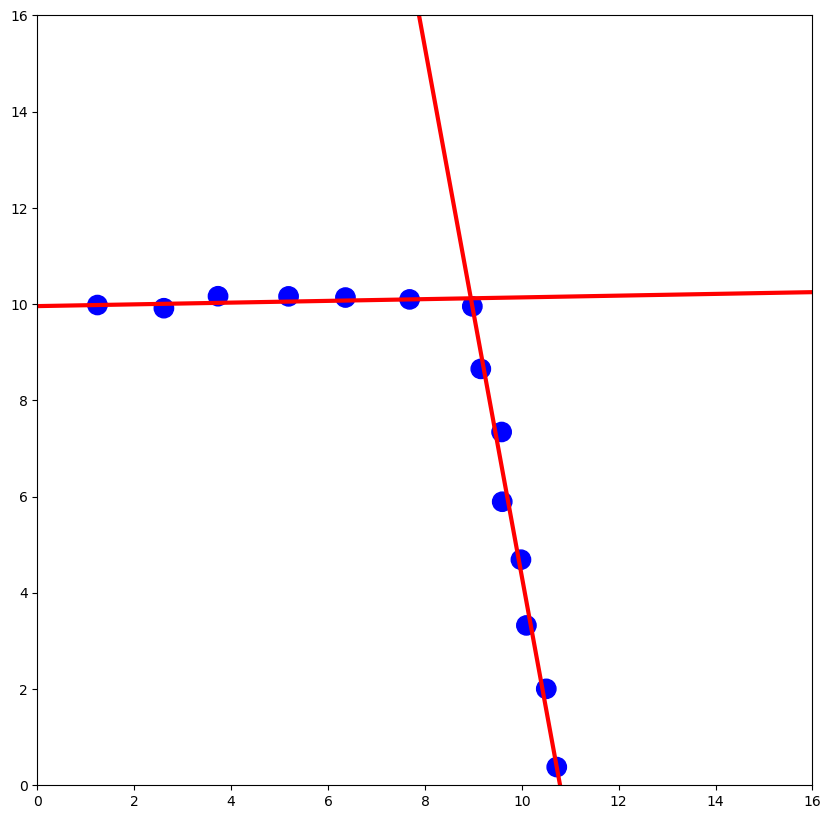

In [17]:
x_points, y_points = get_double_line()
lines = split_and_merge(x_points, y_points)

visualize(x_points, y_points, lines)

Furthest point 9.580937978408569 6.758391538839616
Iter: 0 {(7.553962576896038, 0.7049538693165205): [array([ 9.89877589,  9.67965656, 10.01744634, 10.00571434, 10.08033047,
       10.27519075,  9.58093798,  8.55829504,  7.62891158,  6.80047631,
        5.68351234,  4.92683023,  3.43221436,  2.40129818,  1.26223899]), array([ 0.02259974,  1.16284724,  2.401971  ,  3.43149916,  4.80723835,
        5.87952374,  6.75839154,  7.52518731,  8.5813073 ,  9.13040679,
       10.07343981, 10.25019555, 10.0993378 , 10.07611613, 10.17376902])]}
Iter: 1 {(9.890827882635808, 1.1812143859714312): [[9.580937978408569, 8.558295042731952, 7.628911579898174, 6.800476309588931, 5.683512343207531, 4.9268302331855, 3.432214359124001, 2.4012981759349383, 1.2622389858993535], [6.758391538839616, 7.525187308277533, 8.58130730471372, 9.130406794569554, 10.073439810949193, 10.250195548326525, 10.099337796434284, 10.076116131795748, 10.173769022197176]], (9.876946492209875, -0.06418008593410303): [[9.898775894494

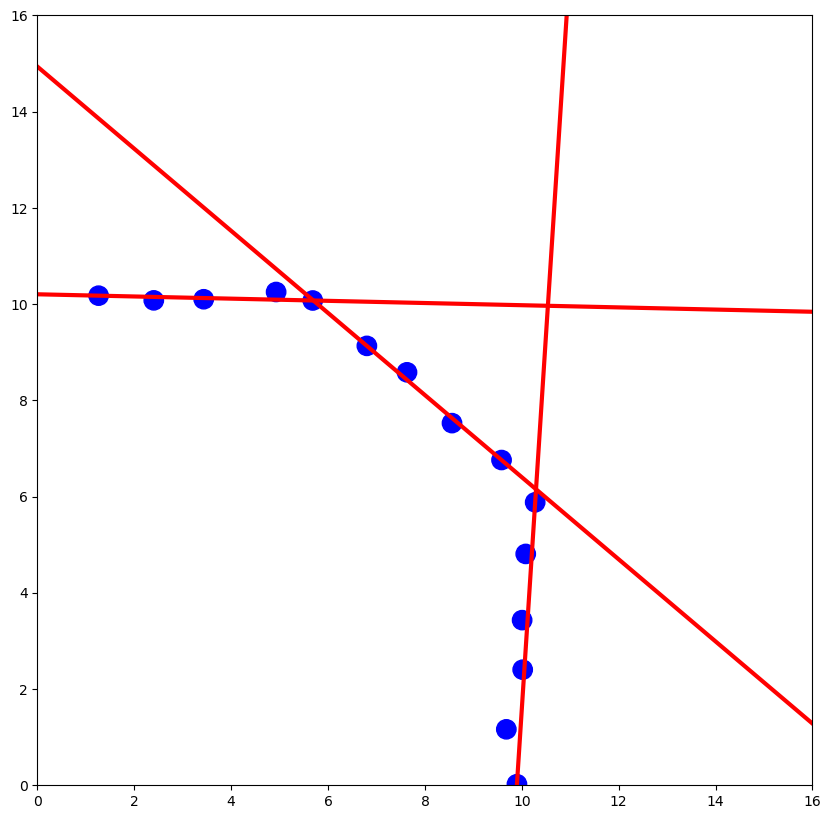

In [18]:
x_points, y_points = get_triple_line()
lines = split_and_merge(x_points, y_points)

visualize(x_points, y_points, lines)

### Theory question 2
In split and merge we set a threshold D, explain the function of this threshold, what happens in its limits: D=0 and D=$\infty$

### Answer

Threshold D is used to make sure the line will fit the points. When the threshold is too big, the line will not fit the points. When D is too small it will cause overfitting. This is the case when D is 0. If D is unlimited the line will not fit the points at all. 

### Theory question 3
In figure below we see some data points with some error. In the book we assume we have error free data. Can you think of a extention to the split-and-merge algorithm that can deal with this kind error in the data?

![title](split_and_merge_error.png)

### Answer

## EXERCISE 3: LINE EXTRACTION ON SENSOR DATA  

### EXERCISE 3.1: SONAR RANGE SCAN

In this part of the assignment, you will use need to use Sonar and GyroA sensors of the robot in to obtain a range scan of a simple, rectangle-shaped room in **assignment_3_scene_1.ttt**. For this task, you will use the same robot as in previous assignments; however, this time the speed of the wheel's rotation has been decreased 10 times to increase the precision of robot's rotation. 

Fill the code of "exercise_sonar" function in **assigment_3.py** - since Sonar is a directional sensor, you need to rotate the robot in place to obtain measurements in all directions. Then, convert the sensors' reading to the cartesian coordinate system. Afterwards, the measurements will be saved in "sonar_coords.csv" file.

**Hint**: The value 255.0 returned by the sensor indicated that no measurement was made - you should remove these data points from the set of observations.

In [19]:
sonar_coords_df = pd.read_csv('./measurements/sonar_coords.csv', index_col=0)

sonar_x_coords = sonar_coords_df['x'].to_numpy()
sonar_y_coords = sonar_coords_df['y'].to_numpy()

You can see the gathered measurements overlayed with the true shape of the room below:

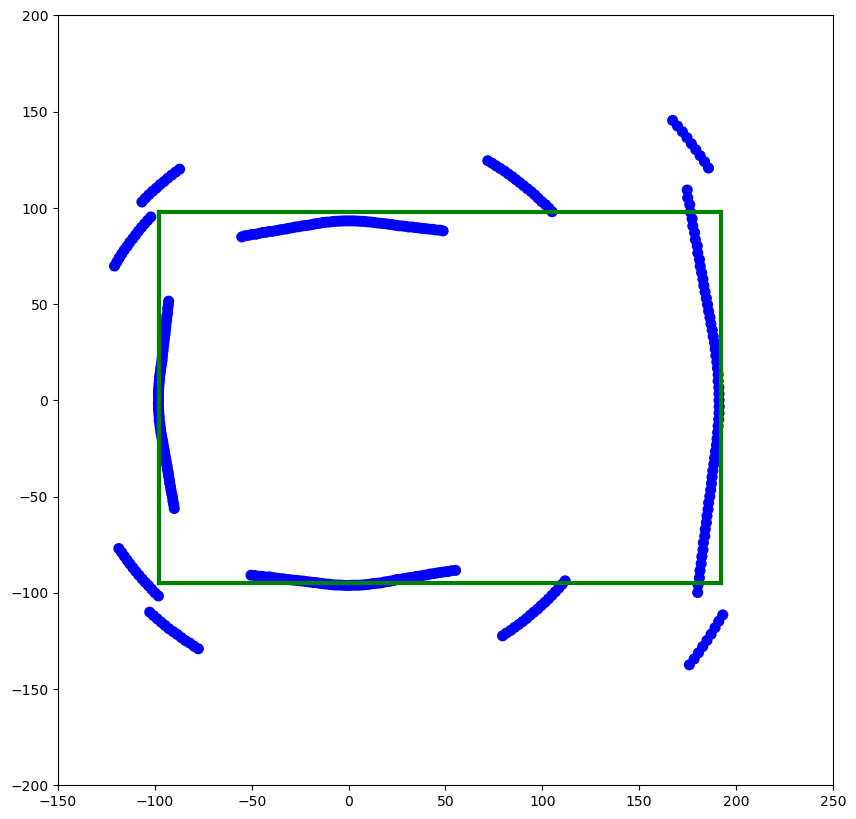

In [20]:
room_corners = get_room_corners()

visualize_room(sonar_x_coords, sonar_y_coords, [], bounds=[-150, 250, -200, 200], room_corners=room_corners)

### Theory question 4

Looking at the above comparison, what do you think affects the quality of ultrasonic sensors's measurements the most? 

### Answer

The further away the wall is, the more imprecise the measurements get. or not a straigt walll

Try your implementation of split and merge on the sonar data. You can test the impact of the distance threshold on the quality of line extraction.

In [21]:
lines = split_and_merge(sonar_x_coords, sonar_y_coords, D=50 ** 2)
room_corners = get_room_corners()

visualize_room(sonar_x_coords, sonar_y_coords, lines, bounds=[-150, 250, -200, 200], room_corners=room_corners)

This line is out of bounds


TypeError: 'bool' object is not subscriptable

### LIDAR RANGE SCAN

This part of the assignment serves as an introduction to LiDAR - another type of sensor commonly used to construct range scans. Compared to sonar, it offers longer measurement range and higher accuracy, which will be essential for the purposes of localisation (Assignment 5) and mapping (Assignment 6). The robot extended with LiDAR sensor is located in ***assignment_3_scene_2.ttt*** scene file. 

The goal of this section is to provide comparison with sonar sensor - you don't need to write your own code. Simply run ```python assignment_3.py --exercise lidar``` to generate the "lidar_coords.csv" file with the 2D coordinates and use the code cells below to visualise the detected points.

In [ ]:
lidar_coords_df = pd.read_csv('./measurements/lidar_coords.csv', index_col=0)

lidar_x_coords = lidar_coords_df['x'].to_numpy()
lidar_y_coords = lidar_coords_df['y'].to_numpy()

In [ ]:
room_corners = get_room_corners()

visualize_room(lidar_x_coords, lidar_y_coords, [], bounds=[-150, 250, -200, 200], room_corners=room_corners)

Below, you can test your implementation of the split-and-merge algorithm on the data from LiDAR. Compared to sonar sensor, the detected lines should more closely resemble the actual wall of the room.

In [ ]:
lines = split_and_merge(lidar_x_coords, lidar_y_coords, D=15 ** 2)
room_corners = get_room_corners()

visualize_room(lidar_x_coords, lidar_y_coords, lines, bounds=[-150, 250, -200, 200], room_corners=room_corners)

# Handing in
Before you hand in this IPYNB please use restart and run all, after running save the notebook and hand in as "assignment_3_GROUPNUMBER.ipynb" with GROUPNUMBER replaced with the number of your group.

Moreover, you should also upload the python script used to get sonar measurements - the file should be renamed to "assignment_3_GROUPNUMBER.py".